In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('./data/USMacroG.csv')
df = df.diff().dropna()
df = df[['consumption', 'dpi', 'cpi','government', 'unemp']]
df.head()

,consumption,dpi,cpi,government,unemp
2,55.1,18.4,1.8,-6.8,-1.0
3,-33.4,13.5,1.7,22.9,-0.4
4,25.2,-2.1,2.4,39.4,-0.7
5,-31.4,17.9,0.3,58.2,-0.4
6,12.5,10.0,0.6,54.1,0.1


# Summary
This section uses the data set USMacroG in R’s AER package. This data set
contains quarterly times series on 12 U.S. macroeconomic variables for the
period 1950–2000. We will use the variables consumption = real consumption expenditures, dpi = real disposable personal income, government = real
government expenditures, and unemp = unemployment rate. Our goal is to
predict changes in consumption from changes in the other variables.

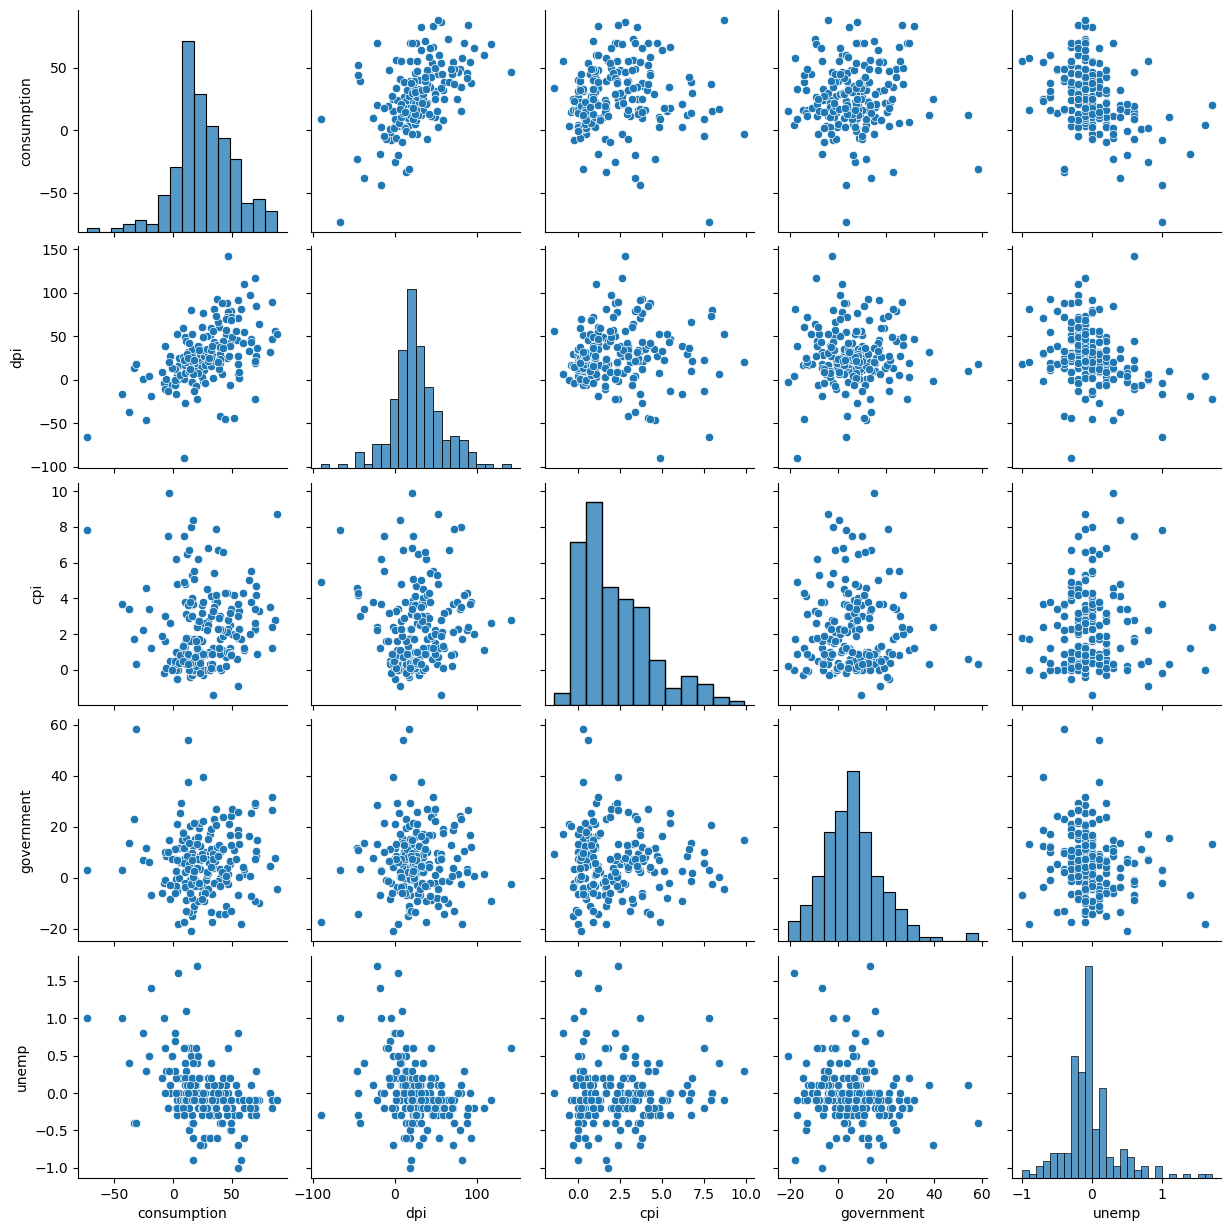

In [22]:
sns.pairplot(df)

We can see that the consumption and dpi has some kind of linear dependence, and we don't see other variables are related to each other.

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [51]:
model = ols(formula='consumption ~ dpi + cpi + government + unemp', data=df).fit()

print(model.summary())
print(confidence_intervals)

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     25.23
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           6.99e-17
Time:                        15:02:00   Log-Likelihood:                -893.52
No. Observations:                 202   AIC:                             1797.
Df Residuals:                     197   BIC:                             1814.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8945      2.547      5.847      0.0

Variables dpi and unemp are useful for predicting the consumption from the table

In [52]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
dpi,1.0,34206.624897,34206.624897,81.965106,1.359186e-16
cpi,1.0,261.490477,261.490477,0.626577,4.295656e-01
government,1.0,171.468547,171.468547,0.410869,5.222738e-01
unemp,1.0,7470.597347,7470.597347,17.900869,3.563849e-05
Residual,197.0,82214.316158,417.331554,NaN,NaN


In ANOVA table, the significance of dpi and unemp confirmed by their low p-values suggests that these variables are important predictors for consumption and should be included in the model. The high p-values for cpi and government suggest they do not add significant explanatory power to the model when considering the variance explained by the model as a whole.